In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("placement.csv")

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


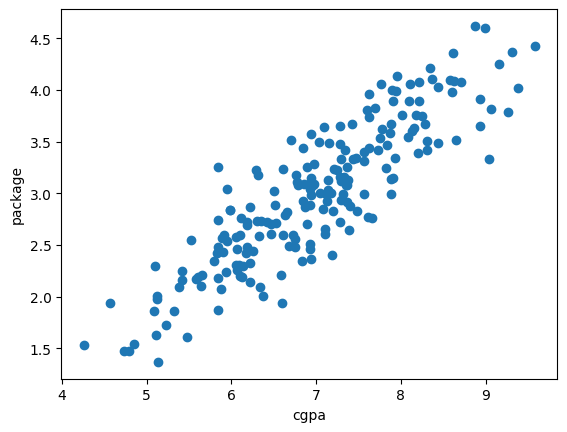

In [6]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("cgpa")
plt.ylabel("package")
plt.show()
#data is linear

In [8]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [9]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [11]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

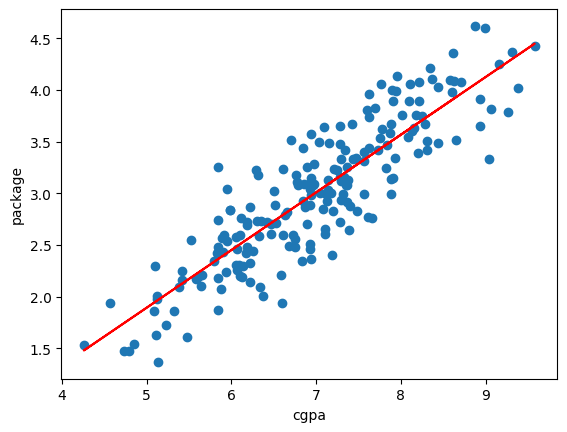

In [18]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel("cgpa")
plt.ylabel("package")
plt.show()
#data is linear

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [23]:
y_pred=lr.predict(x_test)

In [24]:
y_pred


array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [22]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [25]:
print("MAE: ",mean_absolute_error(y_test,y_pred)) #0.28 mistake in LPA

MAE:  0.2884710931878175


In [26]:
print("MSE: ",mean_squared_error(y_test,y_pred)) # mistake

MSE:  0.12129235313495527


In [29]:
print("RMAE: ",np.sqrt(mean_absolute_error(y_test,y_pred))) # mistake in LPA

RMAE:  0.5370950504220063


In [32]:
print("R2 square: ",r2_score(y_test,y_pred)) #cgpa can explain 78 % variance in placement LPA
r2=r2_score(y_test,y_pred)

R2 square:  0.780730147510384


In [34]:
## Adjusted R2 score
x_test.shape

(40, 1)

In [35]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [41]:
new_df1=df.copy()
new_df1['random_feature']=np.random.random(200)

new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.770925,3.26
1,5.12,0.902033,1.98
2,7.82,0.749515,3.25
3,7.42,0.581368,3.67
4,6.94,0.497097,3.57


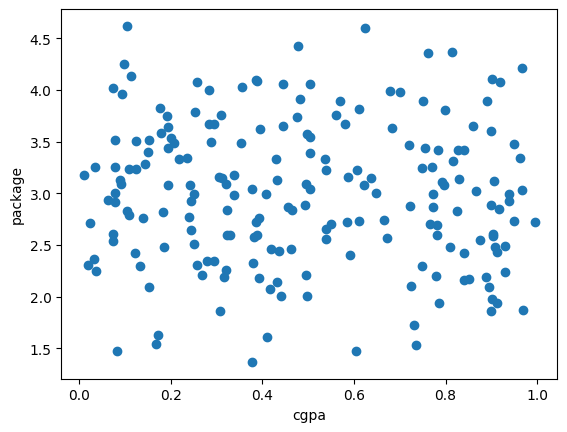

In [43]:
plt.scatter(new_df1["random_feature"],df["package"])
plt.xlabel("cgpa")
plt.ylabel("package")
plt.show()
#data is linear

In [68]:
X=new_df1.iloc[:,0:2]
y=new_df1.iloc[:,-1]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
lr=LinearRegression()

In [71]:
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
y_pred=lr.predict(x_test)

In [73]:
#R2 increases even we add irrelevent column
print("R2 square: ",r2_score(y_test,y_pred)) 
r2=r2_score(y_test,y_pred)

R2 square:  0.779149128677687


In [74]:
1-((1-r2)*(40-1)/(40-1-2))

0.7672112437413457

In [75]:
new_df2=df.copy()
new_df2['IQ']=new_df2["package"]+(np.random.randint(-12,12,200)/10)

new_df2=new_df2[['cgpa','IQ','package']]
new_df2.head()

,cgpa,IQ,package
0,6.89,3.26,3.26
1,5.12,2.08,1.98
2,7.82,4.05,3.25
3,7.42,3.77,3.67
4,6.94,4.47,3.57


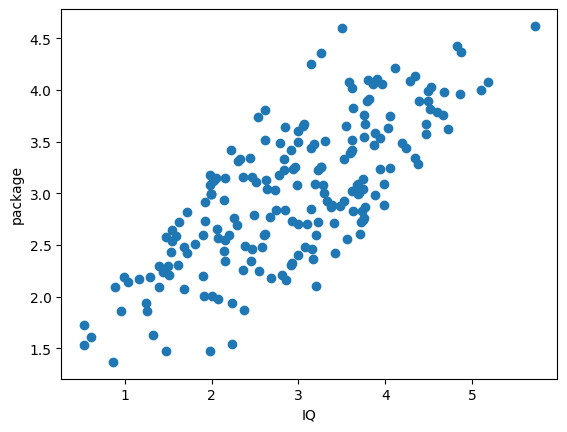

In [76]:
plt.scatter(new_df2["IQ"],df["package"])
plt.xlabel("IQ")
plt.ylabel("package")
plt.show()
#data is linear

In [77]:
X=new_df2.iloc[:,0:2]
y=new_df2.iloc[:,-1]

In [78]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
y_pred=lr.predict(x_test)

In [81]:
#R2 increases even we add relevent column
print("R2 square: ",r2_score(y_test,y_pred)) 
r2=r2_score(y_test,y_pred)

R2 square:  0.7881878660892309


In [82]:
1-((1-r2)*(40-1)/(40-1-2))

0.7767385615535136